In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv(r"D:\Infosys Springboard Internship\FWI Dataset.csv")

features = ['day','month','year','Temperature','RH','Ws','Rain',
            'FFMC','DMC','DC','ISI','BUI','Region']

X = df[features].values
y = df['FWI'].values


In [4]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
alphas = [0.001, 0.01, 0.1, 1, 10, 50, 100]

# Empty lists for metrics
mse_train, mse_test = [], []
rmse_train, rmse_test = [], []
mae_train, mae_test = [], []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # Metrics
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))


In [10]:
best_alpha = alphas[mse_test.index(min(mse_test))]
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Best Alpha:", best_alpha)


Best Alpha: 0.001


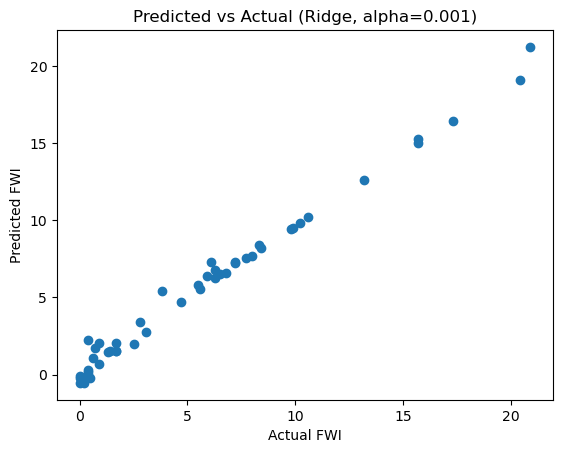

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title(f"Predicted vs Actual (Ridge, alpha={best_alpha})")
plt.show()


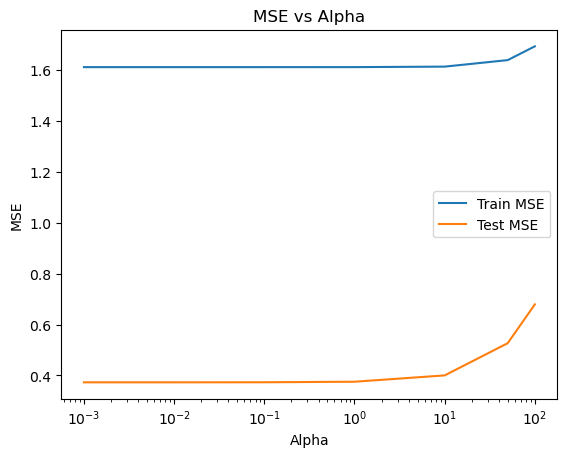

In [12]:
plt.plot(alphas, mse_train, label="Train MSE")
plt.plot(alphas, mse_test, label="Test MSE")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE vs Alpha")
plt.legend()
plt.xscale("log")
plt.show()


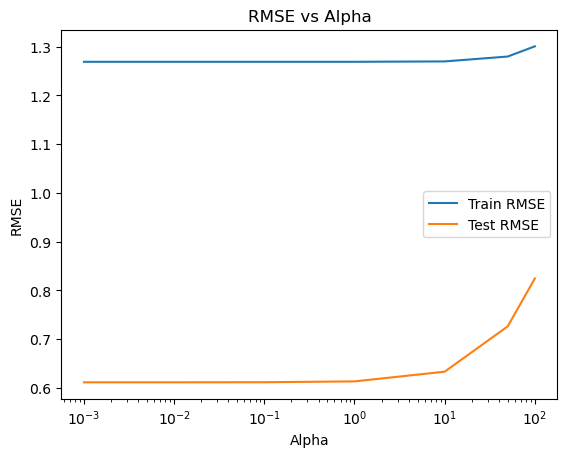

In [13]:
plt.plot(alphas, rmse_train, label="Train RMSE")
plt.plot(alphas, rmse_test, label="Test RMSE")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs Alpha")
plt.legend()
plt.xscale("log")
plt.show()


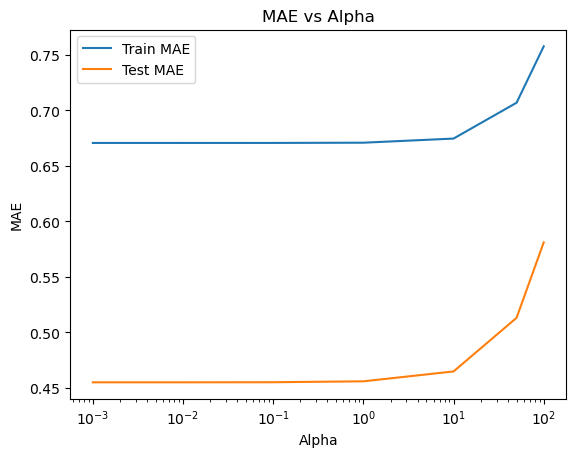

In [14]:
plt.plot(alphas, mae_train, label="Train MAE")
plt.plot(alphas, mae_test, label="Test MAE")
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.title("MAE vs Alpha")
plt.legend()
plt.xscale("log")
plt.show()


In [15]:
train_mse = mse_train[alphas.index(best_alpha)]
test_mse  = mse_test[alphas.index(best_alpha)]

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

if train_mse < test_mse * 0.7:
    print("Model is OVERFITTING")
elif train_mse > test_mse * 1.3:
    print("Model is UNDERFITTING")
else:
    print("Model is GOOD — No Overfitting/Underfitting")


Train MSE: 1.61068776644374
Test MSE: 0.37305506691914214
Model is UNDERFITTING
